In [1]:
# Run this cell if you use Google Colab
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
## Install Library
# !pip install librosa soundfile numpy sklearn pyaudio
# !pip install soundfile
# !pip install seaborn

###Import Modul

In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import soundfile as sf
import librosa
import librosa.display
import warnings
import keras
from IPython.display import Audio
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")


###Load Dataset

#### Run this cell if you use Google Colab and link to Drive

In [3]:
# 
#file_pattern = '/content/drive/My Drive/BangkitAcademy/*.wav'

# Menggunakan glob.glob() untuk mencocokkan pola path dengan nama file
#file_list = glob.glob(file_pattern)

#dataset = []

# Memuat setiap file audio dan menyimpannya dalam dataset
#for file_path in file_list:
    # Memuat file audio menggunakan soundfile
#    audio, sample_rate = sf.read(file_path)
    
    # Menambahkan audio ke dalam dataset
#    dataset.append((audio, sample_rate, file_path))

# Menampilkan informasi dataset
#print("Jumlah file audio:", len(dataset))

In [3]:
# file_list = glob.glob('./dataverse_files/*.wav')

# emotions = []
# paths = []

# for file in file_list:
#     # Menyimpan path file
#     paths.append(file)
#     # Menyimpan emosi file
#     part = os.path.basename(file).split('_')
#     emotions.append(part[2].split('.')[0])

# # Membuat dataframe dari daftar emosi dan path file
# emotion_df = pd.DataFrame(emotions, columns=['Emotions'])
# path_df = pd.DataFrame(paths, columns=['Path'])

# data_df = pd.concat([emotion_df, path_df], axis=1)

# e_dict = {'happy': 'happy', 'sad': 'sad', 'angry': 'angry', 'neutral': 'neutral', 'disgust': 'disgust'}
# data_df['Emotions'] = data_df['Emotions'].map(e_dict)

# del emotion_df
# del path_df

# data_df.head()

,Emotions,Path
0,angry,./dataverse_files\OAF_back_angry.wav
1,disgust,./dataverse_files\OAF_back_disgust.wav
2,NaN,./dataverse_files\OAF_back_fear.wav
3,happy,./dataverse_files\OAF_back_happy.wav
4,neutral,./dataverse_files\OAF_back_neutral.wav


#### Run this cell if you use local

In [5]:
raw_df = []

In [6]:
for folder in os.listdir('./dats/'):
  for file in os.listdir(os.path.join('./dats', folder)):
    raw_df.append([os.path.join('./dats', folder, file), folder])

In [7]:
raw_df

[['./dats\\angry\\OAF_back_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_bar_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_base_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_bath_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_bean_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_beg_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_bite_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_boat_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_bone_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_book_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_bought_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_burn_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_cab_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_calm_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_came_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_cause_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_chain_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_chair_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_chalk_angry.wav', 'angry'],
 ['./dats\\angry\\OAF_chat_angry.wav', 'angry'],
 ['./dats\\angry\

In [8]:
data_df = pd.DataFrame(raw_df, columns =['Path', 'Emotions'])

In [9]:
data_df['Emotions'].value_counts()

Emotions
angry      400
disgust    400
happy      400
neutral    400
sad        400
Name: count, dtype: int64

In [10]:
data_df.to_csv("./dataverse_files/data_df.csv",index=False)
data_df.head

<bound method NDFrame.head of                                  Path Emotions
0     ./dats\angry\OAF_back_angry.wav    angry
1      ./dats\angry\OAF_bar_angry.wav    angry
2     ./dats\angry\OAF_base_angry.wav    angry
3     ./dats\angry\OAF_bath_angry.wav    angry
4     ./dats\angry\OAF_bean_angry.wav    angry
...                               ...      ...
1995     ./dats\sad\YAF_witch_sad.wav      sad
1996     ./dats\sad\YAF_yearn_sad.wav      sad
1997       ./dats\sad\YAF_yes_sad.wav      sad
1998     ./dats\sad\YAF_young_sad.wav      sad
1999     ./dats\sad\YAF_youth_sad.wav      sad

[2000 rows x 2 columns]>

In [11]:
data_df.reset_index(drop=True, inplace=True)

In [12]:
data_df['Emotions'].value_counts()

Emotions
angry      400
disgust    400
happy      400
neutral    400
sad        400
Name: count, dtype: int64

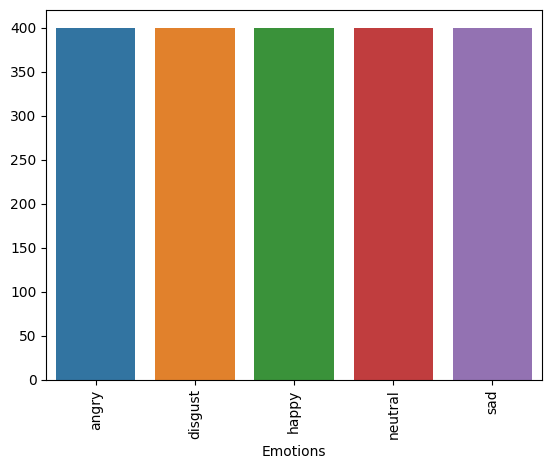

In [13]:
# EDA - Plot histogram
emotion_counts = data_df["Emotions"].value_counts()
plt.xticks(rotation='vertical')
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.show()

### Waveplot & Spectogram

Waveplot : menunjukkan bagaimana amplitudo suara berubah seiring waktu. 

Spektrogram : representasi visual dari spektrum frekuensi suara seiring waktu. 

In [14]:
def waveplot(dat, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(dat, sr=sr)
    plt.show()

def spectogram(dat, sr, emotion):
    x = librosa.stft(dat)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [15]:
emot = ['happy', 'sad', 'angry', 'neutral', 'disgust']

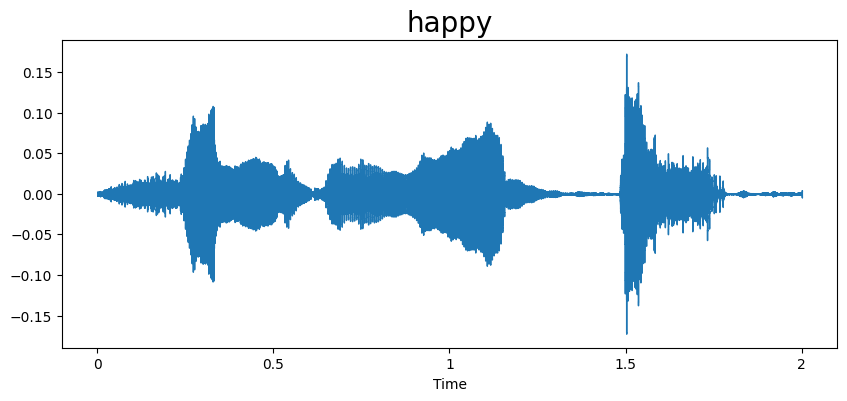

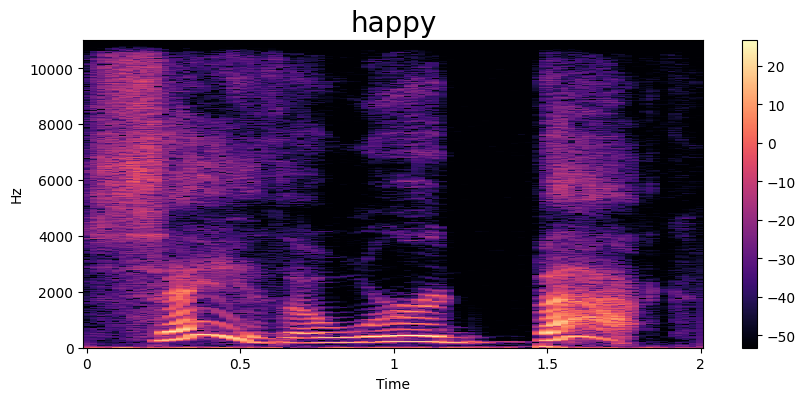

In [16]:
emotion = emot[0]

path = data_df.loc[data_df['Emotions'] == emotion, 'Path'].values[0]
dat, sr = librosa.load(path)

waveplot(dat, sr, emotion)
spectogram(dat, sr, emotion)
Audio(path)

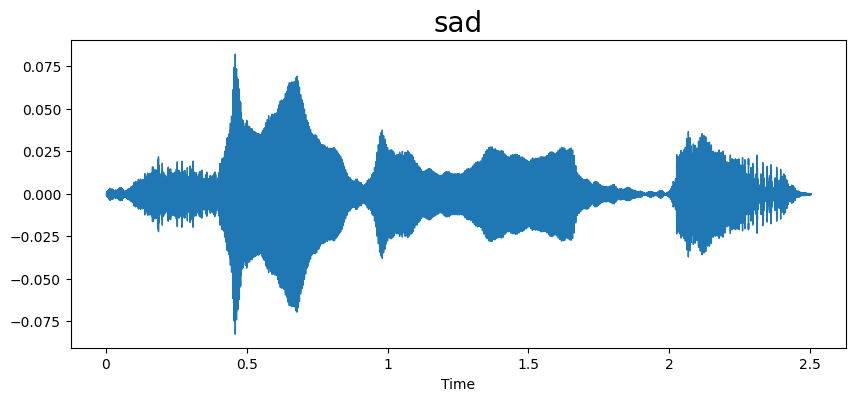

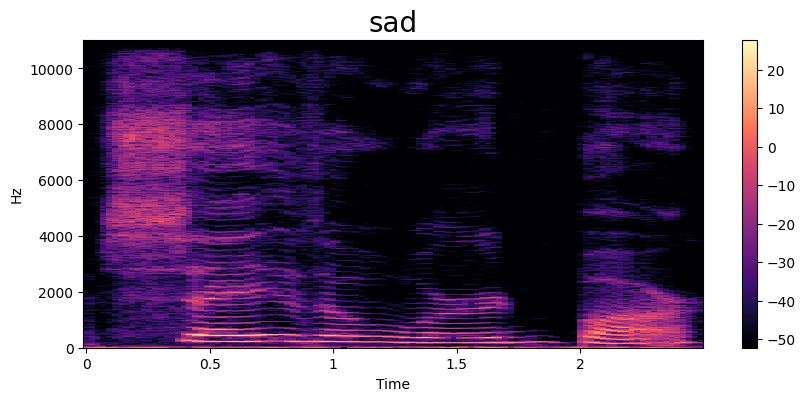

In [17]:
emotion = emot[1]

path = data_df.loc[data_df['Emotions'] == emotion, 'Path'].values[1]
dat, sr = librosa.load(path)

waveplot(dat, sr, emotion)
spectogram(dat, sr, emotion)
Audio(path)

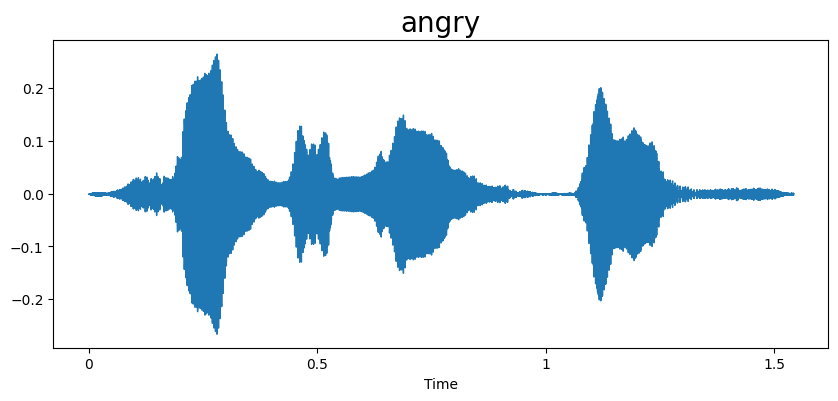

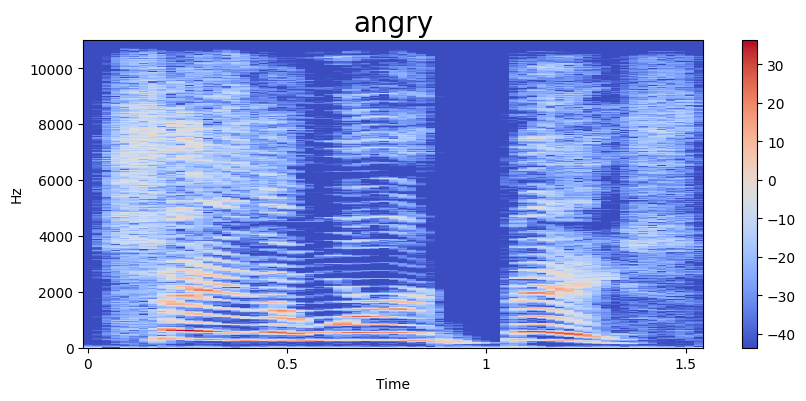

In [18]:
emotion = emot[2]

path = data_df.loc[data_df['Emotions'] == emotion, 'Path'].values[2]
dat, sr = librosa.load(path)

waveplot(dat, sr, emotion)
spectogram(dat, sr, emotion)
Audio(path)

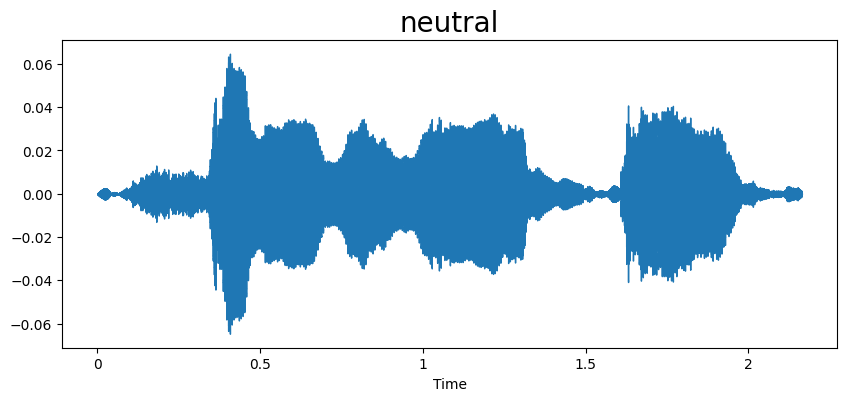

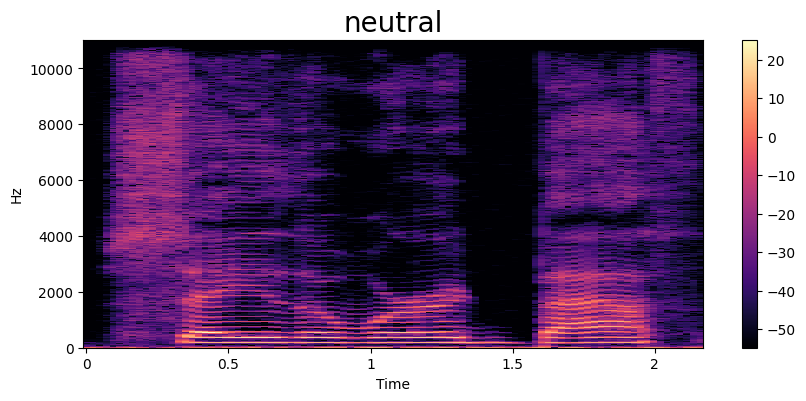

In [19]:
emotion = emot[3]

path = data_df.loc[data_df['Emotions'] == emotion, 'Path'].values[3]
dat, sr = librosa.load(path)

waveplot(dat, sr, emotion)
spectogram(dat, sr, emotion)
Audio(path)

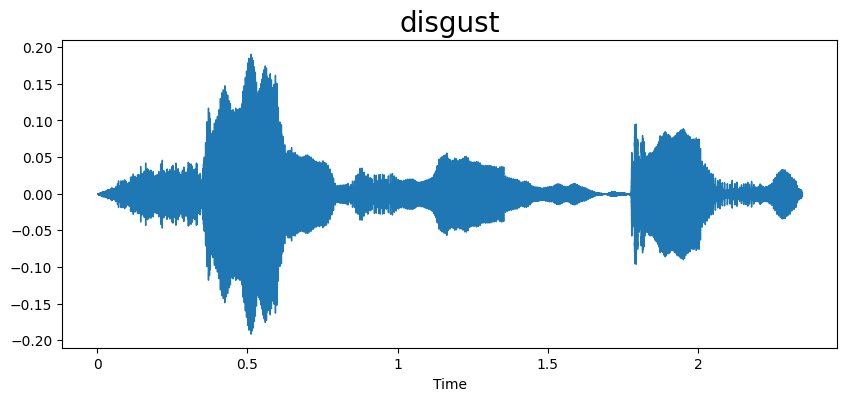

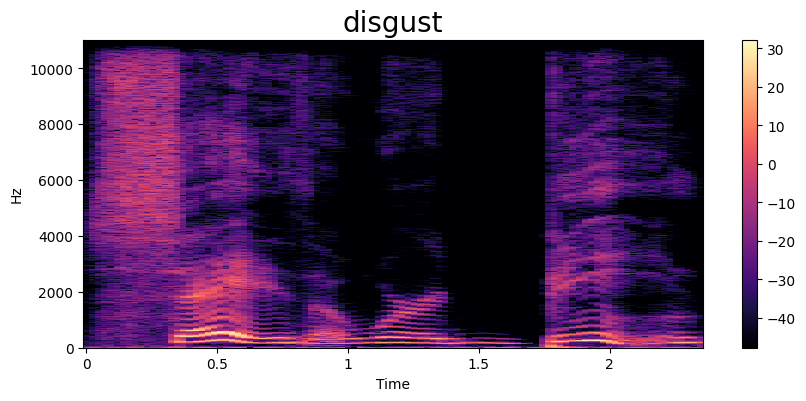

In [20]:
emotion = emot[4]

path = data_df.loc[data_df['Emotions'] == emotion, 'Path'].values[4]
dat, sr = librosa.load(path)

waveplot(dat, sr, emotion)
spectogram(dat, sr, emotion)
Audio(path)

### Data Augmentation

In [21]:
#fungsi menambahkan noise pada data audio
def noise(dat):
  noise_amp = 0.00003 * np.random.uniform() * np.amax(dat)
  dat = dat * noise_amp * np.random.normal(size=dat.shape[0])
  return dat

#fungsi mempercepat atau melambatkan data audio dengan menggunakan time stretching
def stretch(dat):
  return librosa.effects.time_stretch(dat, rate=0.75)

#fungsi menggeser data audio 
#(menggeser elemen-elemen dalam array numpy menggunakan np.roll(). Jumlah geseran acak antara -5 hingga 5 milidetik)
def shift(dat):
  shift_range = int(np.random.uniform(low=-5, high=5)*1000)
  return np.roll(dat, shift_range)

#fungsi mengubah pitch (nada) data audio
def pitch(dat, sr):
  return librosa.effects.pitch_shift(y=dat, sr=sr, n_steps=4)

#ambil beberapa contoh dan mengecek teknis
path = np.array(data_df.Path)[1]
dat, sr = librosa.load(path)

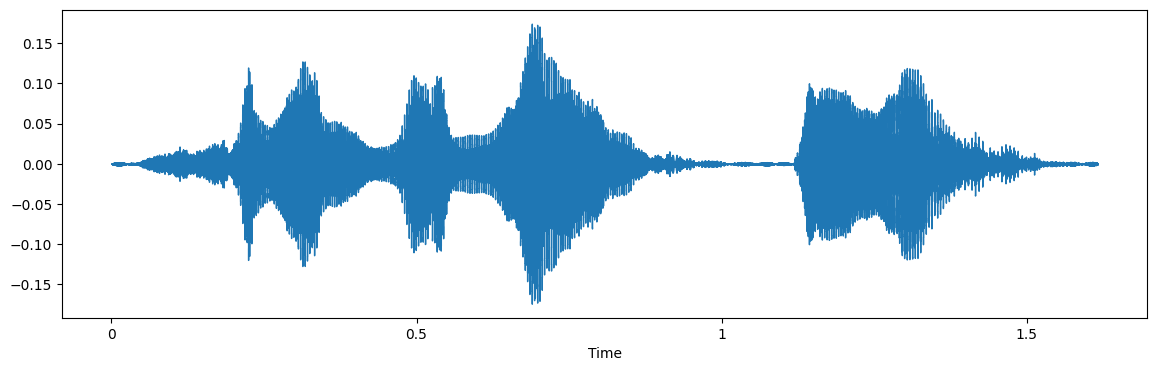

In [22]:
#contoh simple
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=dat, sr=sr)
Audio(path)

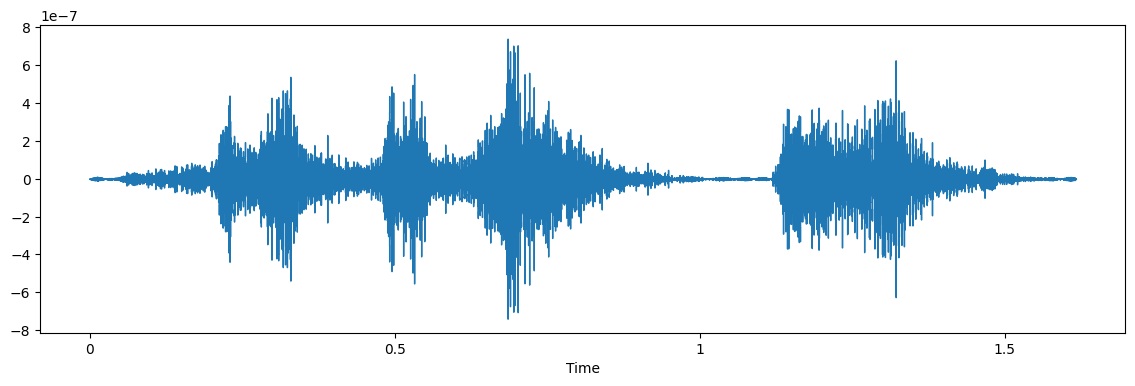

In [23]:
#noise
x=noise(dat)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

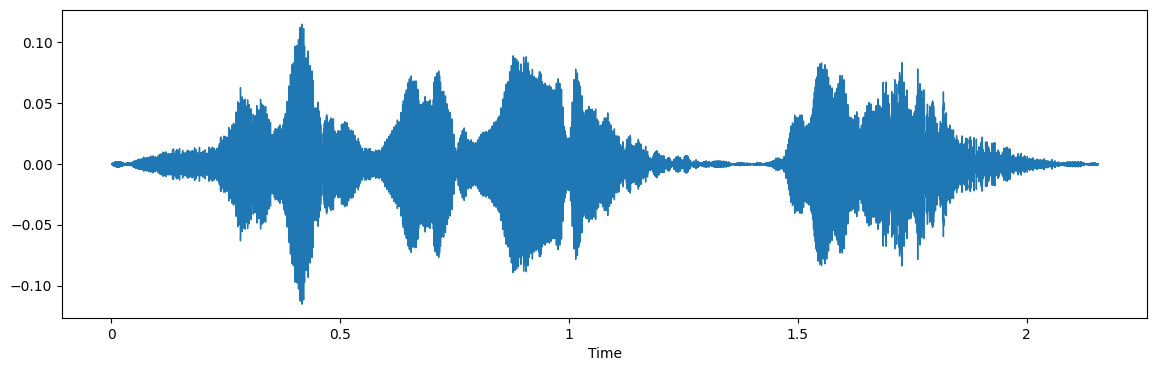

In [24]:
#stretching
x=stretch(dat)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

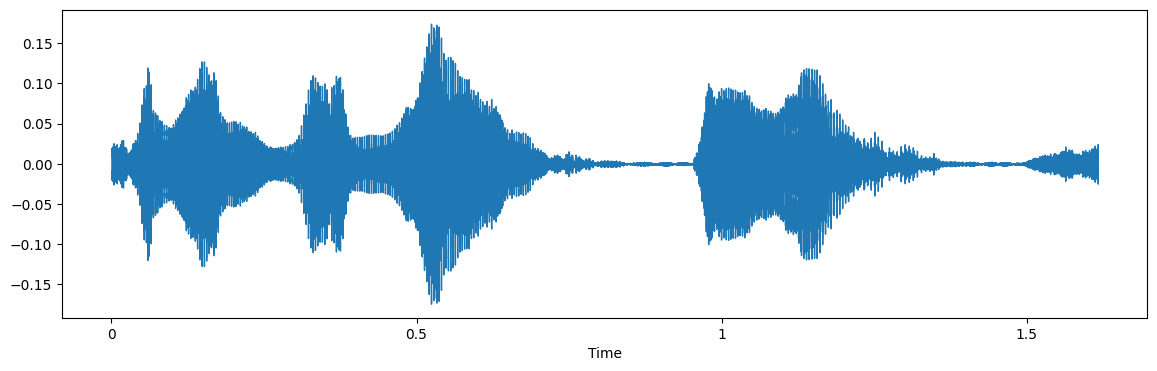

In [25]:
#shifting
x=shift(dat)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

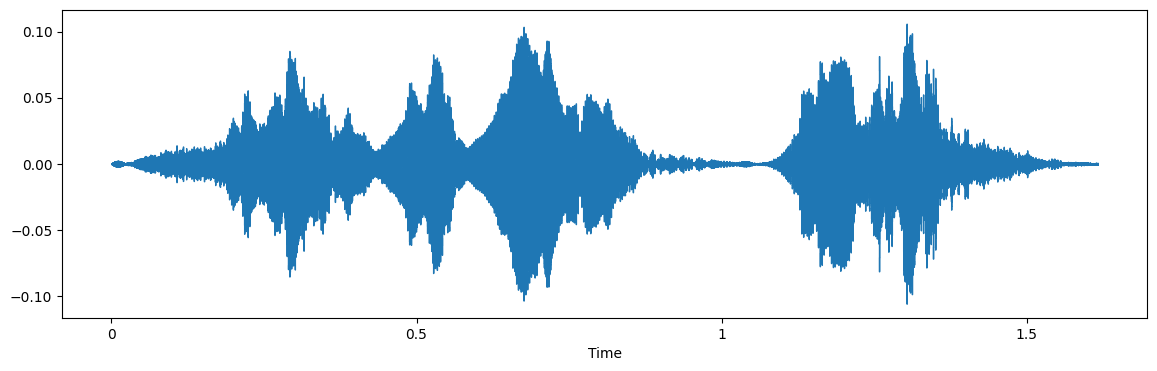

In [26]:
#pitch
#shifting
x=pitch(dat,sr)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

### Feature Extraction

In [27]:
def extract_features(dat):
  #ZCR
  result = np.array([])
  # zcr = np.mean(librosa.feature.zero_crossing_rate(y=dat).T, axis=0)
  # result = np.hstack((result, zcr)) #stacking horizontally

  # #chroma_stft
  # stft = np.abs(librosa.stft(dat))
  # chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
  # result = np.hstack((result, chroma_stft))

  #MFCC
  mfcc = np.mean(librosa.feature.mfcc(y=dat, sr=sr).T, axis=0) 
  result = np.hstack((result, mfcc))

  # root mean square value
  rms = np.mean(librosa.feature.rms(y=dat).T, axis=0) 
  result = np.hstack((result, rms))

  #MelSpectogram
  mel = np.mean(librosa.feature.melspectrogram(y=dat, sr=sr).T, axis=0) 
  result = np.hstack((result, mel))

  return result

def get_features(path):
  dat, sr = librosa.load(path, duration=2.5, offset=0.6)
  
  #tanpa augmentasi
  res1 = extract_features(dat)
  result = np.array(res1)

  #with noise
  # noise_data = noise(dat)
  # res2 = extract_features(noise_data)
  # result = np.vstack((result, res2))

  #stretching &  pitching
  new_data = stretch(dat)
  data_stretch_pitch = pitch(new_data, sr)
  res3 = extract_features(data_stretch_pitch)
  result = np.vstack((result, res3))

  return result

In [28]:
X, Y = [], []

di = zip(data_df['Path'], data_df['Emotions'])
for path, emotion in di :
  try:
    feature = get_features(path)
    for ele in feature :
      X.append(ele)
      Y.append(emotion)
  except:
    print(path)

In [29]:
len(X), len(Y), data_df['Path'].shape

(4000, 4000, (2000,))

In [30]:
new_df = pd.DataFrame(X)
new_df['Emotions'] = Y
new_df.to_csv('dataframe.csv', index=False)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,Emotions
0,-398.608246,75.117401,-21.772625,-19.993965,2.985435,13.788044,-19.953243,-7.025359,-5.187742,1.833246,...,0.000105,0.000157,0.000185,0.000133,0.000134,0.000070,0.000038,0.000034,6.250596e-06,angry
1,-435.457855,62.784199,-40.289902,-21.640230,12.302940,-11.770700,-24.204956,2.728833,-0.921895,5.386346,...,0.000213,0.000168,0.000206,0.000170,0.000123,0.000041,0.000041,0.000018,2.700353e-06,angry
2,-469.633392,101.032448,1.475380,-32.444489,-9.686409,14.370925,-1.291309,-5.177819,-9.246144,5.867874,...,0.000115,0.000082,0.000030,0.000011,0.000015,0.000021,0.000019,0.000015,9.260864e-07,angry
3,-508.431519,87.727814,-24.071020,-37.488564,7.933214,5.827192,-12.773171,-11.624978,2.075786,-6.380317,...,0.000027,0.000048,0.000152,0.000140,0.000077,0.000029,0.000015,0.000008,8.881065e-07,angry
4,-430.067535,41.362911,0.635097,2.689114,6.689570,4.088405,-14.037337,-5.870035,-9.127225,0.862766,...,0.000358,0.000351,0.000266,0.000088,0.000100,0.000195,0.000147,0.000067,2.281613e-06,angry


### Data Preparation

In [31]:
new_df = pd.read_csv('dataframe.csv')

In [32]:
X = new_df.iloc[:, :-1].values
Y = new_df['Emotions'].values

In [33]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [34]:
#mensplit data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3200, 149), (3200, 5), (800, 149), (800, 5))

In [35]:
from sklearn.preprocessing import StandardScaler
#scalling data dengan standard scaler sklearn
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3200, 149), (3200, 5), (800, 149), (800, 5))

In [36]:
#buat data kompatible terhadap model
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [37]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3200, 149, 1), (3200, 5), (800, 149, 1), (800, 5))

### Membuat Model

In [63]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Dropout(0.4))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 147, 32)           128       
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 147, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_27 (Conv1D)          (None, 145, 64)           6208      
                                                                 
 max_pooling1d_27 (MaxPoolin  (None, 145, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_28 (Conv1D)          (None, 143, 128)          24704     
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 143, 128)        

In [64]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# es = EarlyStopping(monitor='val_accuracy', patience=3)
# rlrp = ReduceLROnPlateau(monitor='loss', patience=2, factor=0.4, verbose=0, min_lr=0.01) #
model_22 = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
50/50 [==============================] - 2s 29ms/step - loss: 1.5471 - accuracy: 0.2706 - val_loss: 1.3855 - val_accuracy: 0.4913
Epoch 2/30
50/50 [==============================] - 1s 28ms/step - loss: 1.2447 - accuracy: 0.4772 - val_loss: 0.9197 - val_accuracy: 0.6350
Epoch 3/30
50/50 [==============================] - 1s 27ms/step - loss: 0.9092 - accuracy: 0.5859 - val_loss: 0.6807 - val_accuracy: 0.6925
Epoch 4/30
50/50 [==============================] - 1s 27ms/step - loss: 0.6893 - accuracy: 0.6816 - val_loss: 0.4250 - val_accuracy: 0.9025
Epoch 5/30
50/50 [==============================] - 1s 25ms/step - loss: 0.4565 - accuracy: 0.8631 - val_loss: 0.1411 - val_accuracy: 0.9563
Epoch 6/30
50/50 [==============================] - 1s 26ms/step - loss: 0.2824 - accuracy: 0.9259 - val_loss: 0.0966 - val_accuracy: 0.9675
Epoch 7/30
50/50 [==============================] - 1s 26ms/step - loss: 0.2142 - accuracy: 0.9453 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 8/30
50

In [65]:
num_epochs = 30

25/25 [==============================] - 0s 13ms/step - loss: 0.0307 - accuracy: 0.9950
Testing accuracy of our model:  99.50000047683716 %


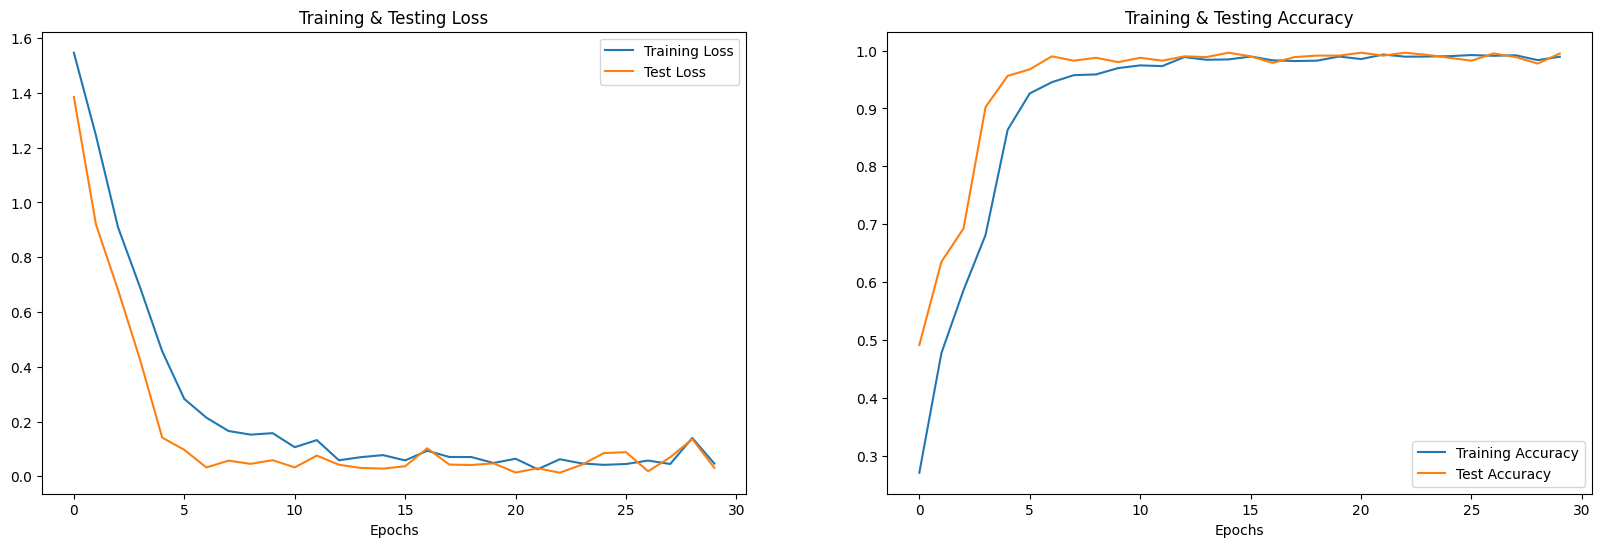

In [66]:
print('Testing accuracy of our model: ', model.evaluate(x_test, y_test)[1]*100, '%')
epochs = [i for i in range(num_epochs)]
fig, ax = plt.subplots(1,2)
train_acc = model_22.history['accuracy']
train_loss = model_22.history['loss']
test_acc = model_22.history['val_accuracy']
test_loss = model_22.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Test Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Test Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epochs')
plt.show()

In [67]:
#prediksi di data test
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [68]:
c_df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])

c_df['Predicted Labels'] = y_pred.flatten()
c_df['Actual Labels'] = y_test.flatten()

In [69]:
c_df.sample(10)

,Predicted Labels,Actual Labels
676,happy,happy
326,happy,happy
203,happy,happy
331,angry,angry
618,disgust,disgust
661,disgust,disgust
642,sad,sad
646,neutral,neutral
598,happy,happy
627,happy,happy


<Axes: xlabel='None', ylabel='None'>

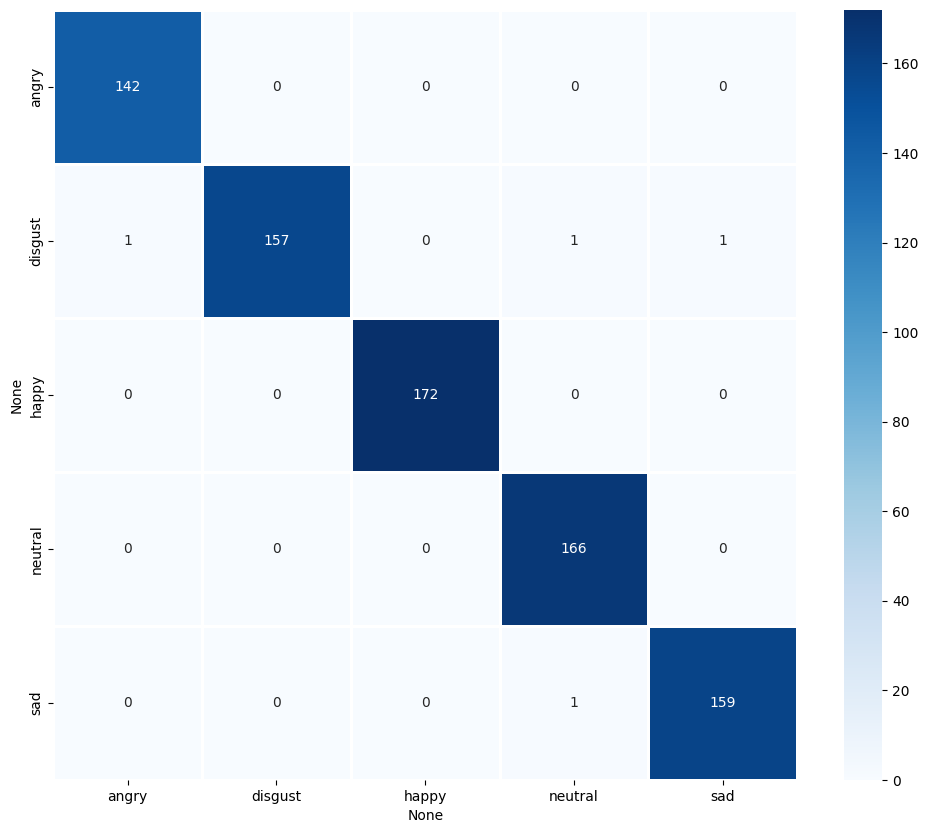

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')


In [73]:
model.save('./saved_model/model.h5')

ImportError: `save_model()` using h5 format requires h5py. Could not import h5py.

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [ ]:
# Emotions in the RAVDESS & TESS dataset
emotions={
  '01':'neutral',
  '02':'happy',
  '03':'sad',
  '04':'angry',
  '05':'disgust',
}
# Emotions to observe
observed_emotions=['neutral','happy','sad','angry', 'disgust']

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('/content/drive/My Drive/BangkitAcademy/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75,random_state=9)